In [77]:
import numpy as np 
import matplotlib.pyplot as plt 
import cv2 as cv  

In [78]:
np.random.seed(42)

In [79]:
image = cv.imread("/content/white-tower.png")
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)

In [80]:
image.shape

(720, 1280, 3)

In [81]:
def centroidDistance(x1, x2):
  distance = np.sqrt(np.sum((x1 - x2)**2))
  return distance

# **KMeans**


---






In [82]:
flattenedImage = image.reshape((-1, 3))
flattenedImage = np.float32(flattenedImage)

In [83]:
K = 10

In [84]:
clusters = [[]] * K

In [85]:
noOfCoordinates, colorsSize = flattenedImage.shape
noOfCoordinates, colorsSize

(921600, 3)

In [86]:
randomXYCoordinates = np.random.choice(noOfCoordinates, K, replace=False)
randomXYCoordinates

array([744928, 137168, 282310, 322660, 161130, 805021, 670620, 849854,
       684121, 217871])

In [87]:
centroids = [None] * K

In [88]:
for i, j in enumerate(randomXYCoordinates):
  centroids[i] = flattenedImage[j]

In [89]:
def formClusters(K, flattenedImage, centroids):
  clusters = [[] for _ in range(K)]
  for i, j in enumerate(flattenedImage):
    distances = [centroidDistance(j, centroid) for centroid in centroids]
    centroidIndex = np.argmin(distances)
    clusters[centroidIndex].append(i)
  # print(clusters)
  return clusters

In [139]:
def newCentroids(K, flattenedImage, clusters):
  centroids = np.zeros((K, colorsSize))
  for i, j in enumerate(clusters):
    if (len(j) == 0):
        centroids[i] = 31
    else:
      clusterAvg = np.mean(flattenedImage[j], axis=0)
      centroids[i] = clusterAvg
  return centroids

In [91]:
def convergence(K, oldCentroids, newCentroids):
  distances = [centroidDistance(oldCentroids[i], newCentroids[i]) for i in range(K)]
  return sum(distances) == 0

In [92]:
def Kmeans(K, flattenedImage, centroids, iterations=10):
  for i in range(iterations):
    clusters = formClusters(K, flattenedImage, centroids)
    oldCentroids = centroids
    centroids = newCentroids(K, flattenedImage, clusters) # New Centroids
    isConvergence = convergence(K, oldCentroids, centroids)
    if (isConvergence):
      break

  # assigning cluster labels
  clusterLabels = np.empty(noOfCoordinates)
  for i, cluster in enumerate(clusters):
    for k in cluster:
      clusterLabels[k] = i
  return clusterLabels, centroids, clusters

In [93]:
clusterLabels, centroids, clusters = Kmeans(K, flattenedImage, centroids)
labels = clusterLabels.astype(int)
flattenLabels = labels.flatten()
centroids = np.uint8(centroids)
resultedImage = centroids[flattenLabels.flatten()]
resultedImage = resultedImage.reshape(image.shape)

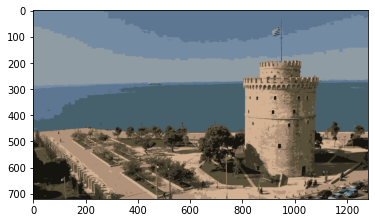

In [94]:
plt.imshow(resultedImage)
plt.show()

# **Pixel Classification**


---






In [124]:
trainingImage = cv.imread("/content/sky_train.jpg")
trainingImageMask = cv.imread("/content/sky_train_mask.jpg")
trainingImage = cv.cvtColor(trainingImage, cv.COLOR_BGR2RGB)
trainingImageMask = cv.cvtColor(trainingImageMask, cv.COLOR_BGR2RGB)
K = 10

In [125]:
trainingImageReshaped = trainingImage.reshape((-1, 3))
trainingImageReshaped

array([[117, 170, 214],
       [108, 162, 206],
       [104, 158, 205],
       ...,
       [ 31,  31,  31],
       [ 31,  31,  31],
       [ 31,  31,  31]], dtype=uint8)

In [126]:
trainingImageMaskReshaped = trainingImageMask.reshape((-1, 3))
trainingImageMaskReshaped

array([[255, 255, 255],
       [255, 255, 255],
       [255, 255, 255],
       ...,
       [ 31,  31,  31],
       [ 31,  31,  31],
       [ 31,  31,  31]], dtype=uint8)

In [127]:
sky = []
non_sky = []
for i, j in enumerate(trainingImageReshaped):
  rM, gM, bM = trainingImageMaskReshaped[i]
  if(rM == 255 and gM == 255 and bM == 255):
    sky.append(trainingImageReshaped[i])
  else:
    non_sky.append(trainingImageReshaped[i])

In [128]:
sky = np.asarray(sky)
sky.shape

(34319, 3)

In [129]:
non_sky = np.asarray(non_sky)
non_sky.shape

(31217, 3)

In [150]:
# Sky Kmeans
clusters = [[]] * K
noOfCoordinates, colorsSize = sky.shape
noOfCoordinates, colorsSize
randomXYCoordinates = np.random.choice(noOfCoordinates, K, replace=False)
randomXYCoordinates
centroids = [None] * K
for i, j in enumerate(randomXYCoordinates):
  centroids[i] = sky[j]

In [158]:
centroids

[array([41, 41, 41], dtype=uint8),
 array([87, 87, 53], dtype=uint8),
 array([196, 173, 129], dtype=uint8),
 array([31, 31, 31], dtype=uint8),
 array([31, 31, 33], dtype=uint8),
 array([31, 31, 31], dtype=uint8),
 array([183, 166, 120], dtype=uint8),
 array([31, 31, 31], dtype=uint8),
 array([150, 146, 111], dtype=uint8),
 array([102, 104,  90], dtype=uint8)]

In [152]:
sky_visual_words = Kmeans(K, sky, centroids, 15)

In [154]:
sky_visual_words = sky_visual_words[1]

In [156]:
# Non-Sky Kmeans
clusters = [[]] * K
noOfCoordinates, colorsSize = non_sky.shape
noOfCoordinates, colorsSize
randomXYCoordinates = np.random.choice(noOfCoordinates, K, replace=False)
randomXYCoordinates
centroids = [None] * K
for i, j in enumerate(randomXYCoordinates):
  centroids[i] = non_sky[j]

In [ ]:
centroids

In [160]:
non_sky_visual_words = Kmeans(K, non_sky, centroids, 15)

In [161]:
non_sky_visual_words = non_sky_visual_words[1]

In [268]:
testImage1 = cv.imread("/content/sky_test1.jpg")
testImage1 = cv.cvtColor(testImage1, cv.COLOR_BGR2RGB)

In [269]:
testImage1Reshaped = testImage1.reshape((-1, 3))
testImage1Reshaped.shape

(65536, 3)

In [280]:
def findSky(testImage, sky_visual_words, num):
  sky_Pixel = []
  non_sky_Pixel = []
  for i, j in enumerate(testImage):
    r, g, b = testImage[i]
    for k, l in enumerate(sky_visual_words):
      rSky, gSky, bSky = sky_visual_words[k]
      if(abs(r-rSky) < num and abs(g-gSky) < num and abs(b-bSky) < num):
        # print(i,": Sky")
        sky_Pixel.append(i)
      else:  
        # print(i,": Non-Sky")
        non_sky_Pixel.append(i)

  for i, j in enumerate(testImage):
    for k in sky_Pixel:
      if (i == k):
        testImage[i][0] = 255
        testImage[i][1] = 0
        testImage[i][2] = 0
  return testImage

In [284]:
skyImageOutput = findSky(testImage1Reshaped, sky_visual_words, 30)
resultedImage = skyImageOutput.reshape(testImage1.shape)

<function matplotlib.pyplot.show>

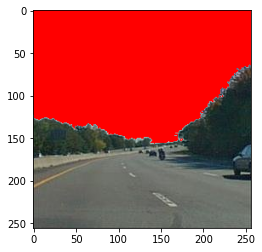

In [285]:
plt.imshow(resultedImage)
plt.show

In [273]:
testImage2 = cv.imread("/content/sky_test2.jpg")
testImage2 = cv.cvtColor(testImage2, cv.COLOR_BGR2RGB)
testImage2Reshaped = testImage2.reshape((-1, 3))
testImage2Reshaped.shape

(65536, 3)

In [288]:
skyImageOutput = findSky(testImage2Reshaped, sky_visual_words, 27)
resultedImage = skyImageOutput.reshape(testImage2.shape)

<function matplotlib.pyplot.show>

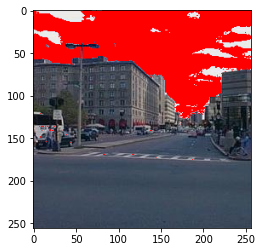

In [289]:
plt.imshow(resultedImage)
plt.show

In [314]:
testImage3 = cv.imread("/content/sky_test3.jpg")
testImage3 = cv.cvtColor(testImage3, cv.COLOR_BGR2RGB)
testImage3Reshaped = testImage3.reshape((-1, 3))
testImage3Reshaped.shape

(65536, 3)

In [315]:
skyImageOutput = findSky(testImage3Reshaped, sky_visual_words, 13)
resultedImage = skyImageOutput.reshape(testImage3.shape)

<function matplotlib.pyplot.show>

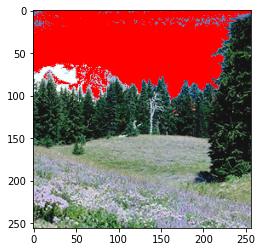

In [316]:
plt.imshow(resultedImage)
plt.show

In [317]:
testImage4 = cv.imread("/content/sky_test4.jpg")
testImage4 = cv.cvtColor(testImage4, cv.COLOR_BGR2RGB)
testImage4Reshaped = testImage4.reshape((-1, 3))
testImage4Reshaped.shape

(65536, 3)

In [326]:
skyImageOutput = findSky(testImage4Reshaped, sky_visual_words, 75)
resultedImage = skyImageOutput.reshape(testImage4.shape)

<function matplotlib.pyplot.show>

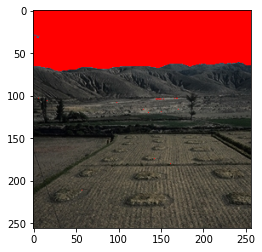

In [327]:
plt.imshow(resultedImage)
plt.show